In [2]:
import shap
import joblib
import pandas as pd


/home/olana/Desktop/KAIM 3/Week 3/insurance-analysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Load the processed data
df = pd.read_csv('../data/processed/processed_data_with_dates.csv')

# Apply one-hot encoding if Province_Gauteng does not exist
if 'Province_Gauteng' not in df.columns:
    df = pd.get_dummies(df, columns=['Province'], drop_first=True)

# Save the updated processed data with encoded features
df.to_csv('../data/processed/engineered_data.csv', index=False)

# Verify the columns
print([col for col in df.columns if 'Province' in col])


/tmp/ipykernel_8090/4278171237.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/processed_data_with_dates.csv')


['Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape', 'Province_Western Cape']


In [13]:
# Load the updated engineered data
df = pd.read_csv('../data/processed/engineered_data.csv')

# Check if 'Province_Gauteng' exists
print(df.columns)

# Define features for SHAP analysis
X = df[['TotalPremium', 'Province_Gauteng']]



/tmp/ipykernel_8090/3761748030.py:2: DtypeWarning: Columns (31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/engineered_data.csv')


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'Year', 'Month', 'Province_Free State',
       'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo',
       

In [19]:
# Check for non-numeric columns
print(X.dtypes)

# Identify object columns
object_cols = X.select_dtypes(['object']).columns

if len(object_cols) > 0:
    print("Non-numeric columns detected:", object_cols)

    # Apply one-hot encoding if necessary
    X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(0)

# Ensure dtype is float64
X = X.astype('float64')

# Verify again
print(X.dtypes)


TotalPremium        float64
Province_Gauteng    float64
dtype: object
TotalPremium        float64
Province_Gauteng    float64
dtype: object


100%|===================| 999730/1000098 [44:11<00:00]        

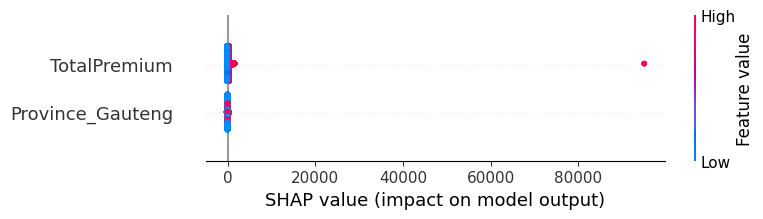

In [20]:
explainer = shap.Explainer(xgb, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)



In [21]:
# Force plot for a single instance (first row)
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [ ]:
# Dependence plot to show how TotalPremium influences predictions
shap.dependence_plot("TotalPremium", shap_values, X)


In [ ]:
shap.summary_plot(shap_values, X, show=False)
plt.savefig('../reports/shap_summary_plot.png', dpi=300)
